# Анализ продаж компьютерных игр для интернет-магазина

**Задача**

Интернет-магазин  продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., нужно создать кампанию на 2017-й. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span>
    <li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li>
    <li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li>
    <li><span><a href="#Составление-портрета-пользователя-каждого-региона" data-toc-modified-id="Составление-портрета-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составление портрета пользователя каждого региона</a></span></li>
    <li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li>
    <li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li>

# 1. Изучение данных

**Описание данных**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import warnings
#импортируем библиотеку scipy для проверки статистической гипотезы
from scipy import stats as st

In [106]:
try:
    #data = pd.read_csv('/datasets/games.csv')
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/Сборный Проект №1/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [108]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [109]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [110]:
data.duplicated().sum()

0

**Вывод:**

исходная таблица содержит 11 столбцов и 16715 строк;

имена столбцов содержат заглавные буквы;

присутствуют два типа данных: object, float;

есть пропуски в 5 столбцах;

дубликаты отсутствуют.
    

## Подготовка данных

Замените названия столбцов (приведите к нижнему регистру);

In [111]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Преобразуем значения в столбце 'year_of_release' тип int для более удобного отображения (предварительно заменим пропуски на 0).

In [112]:
data['year_of_release'].isna().sum()/data['year_of_release'].count()

0.01635656086586404

In [113]:
data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype('int')
data['year_of_release'].dtypes
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Обработаем другие пропуски.

В двух строках пропущено название игры. Поскольку восстановить данные нет возможности, а их количество невелико, удалим эти строки.

In [114]:
data = data.dropna(subset=['name'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [115]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заменим пропуски в столбце с рейтингом игр на фразу "нет данных".

In [116]:
data['rating'] = data['rating'].fillna('нет данных')
data['rating'].isna().sum()

0

In [117]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [118]:
data['user_score'][data['user_score']=='tbd'].count()/data['user_score'].count()

0.24206111443978431

Среди значений встречается значение tbd, означающее, что ячейка будет определена позднее. Доля таких значений 24%. 
Также важно заметить, что тип данных столбца -- object, что неудобно для дальнейшей работы.

Поэтому, заменим 'tbd' на 'nan' и переведем значения в тип float.

In [119]:
data['user_score'] = data['user_score'].replace('tbd','nan')
data['user_score'] = data['user_score'].astype('float')

In [120]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Для удобства анализа добавим столбец с суммарным количеством продаж во всех регионах.

In [122]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,нет данных,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,нет данных,31.38


Проанализируем пропуски в столбце 'user_score':

In [123]:
# доля пропусков
data['user_score'].isna().sum()/data['user_score'].count()

1.2019762845849802

Оставим пропуски в столбце с оценками критиков. При дальнейшем анализе игр по отзывам критиков важно учитывать только те игры, на которые оставлены отзывы. Заменять пропуски на ноль не целесообразно, поскольку это повлияет на среднюю оценку.

**Вывод:**
* названия столбцов приведены к нижнему регистру;
* заменен тип данных в столбце 'year_of_release' на int для более удобного отображения года выхода;
* удалены 2 строки с пропусками в колонке с названием игры 'Name'; пропуски в колонках с рейтингом оставлены;
* в столбце 'user_score' значения 'tbd' заменены на 'nan' и изменен тип object на float;
* в столбце 'critic_score' оставлены пропуски;
* добавлен столбец с суммарным количеством продаж во всех регионах

## Исследовательский анализ данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [124]:
data['year_of_release'].value_counts().head(15)

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
Name: year_of_release, dtype: int64

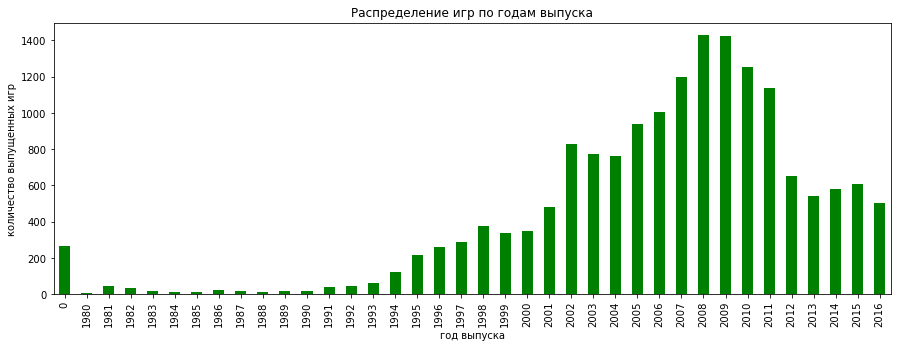

In [125]:
data.groupby('year_of_release')['name'].count().plot(title='Распределение игр по годам выпуска', 
                                                     y='name', 
                                                     x='year_of_release', 
                                                     kind='bar', 
                                                     color='g', 
                                                     figsize=(15,5), 
                                                     xlim=(1970,2017))
plt.xlabel('год выпуска')
plt.ylabel('количество выпущенных игр');

Интерес пердставляют только данные за последние года.

Посмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [126]:
#выберем платформы с наибольшими суммарными продажами
data['platform'].value_counts().head(10)

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: platform, dtype: int64

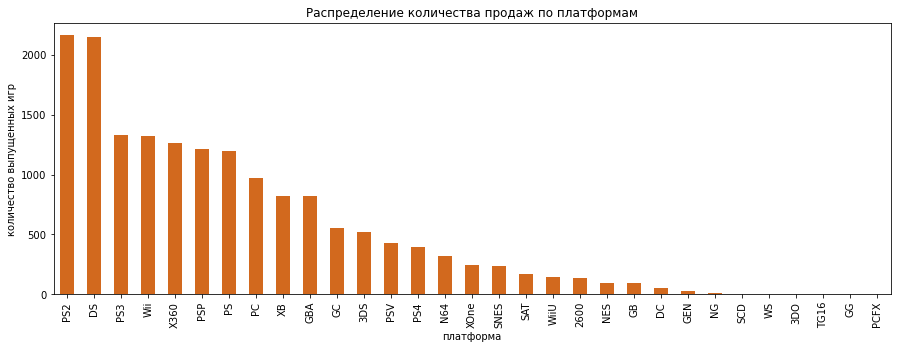

In [127]:
data['platform'].value_counts().plot(title='Распределение количества продаж по платформам', 
                                              y='name', 
                                              x='paltform', 
                                              kind='bar', 
                                              color='chocolate', 
                                              figsize=(15,5), 
                                              xlim=(1970,2017))
plt.xlabel('платформа')
plt.ylabel('количество выпущенных игр');

Выделим платформы с наибольшими суммарными продажами (большими 1000) в отдельный датасет и построим распределение по годам.

In [128]:
data_top = data[(data['platform'] == 'PS2')| (data['platform'] =='DS')|(data['platform'] == 'PS3')|(data['platform'] == 'Wii')|(data['platform'] == 'X360')|(data['platform'] == 'PSP')|(data['platform'] == 'PS')]
data_top.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [129]:
data_top['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'PS', 'PSP'], dtype=object)

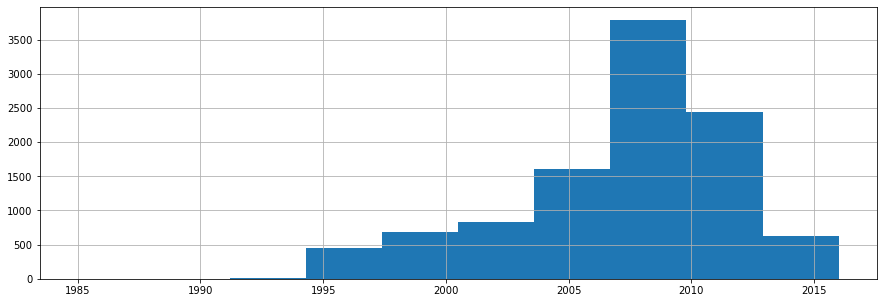

In [130]:
data_top[data_top['year_of_release']>0]['year_of_release'].hist(figsize=(15,5));

За какой характерный срок появляются новые и исчезают старые платформы?

**Вывод:** Платформы появляются и исчезают с 1995 по 2015 год.

Чтобы узнать, в какой срок появилась и исчезла каждая из выбранных платформ, построим для каждой из них графики.

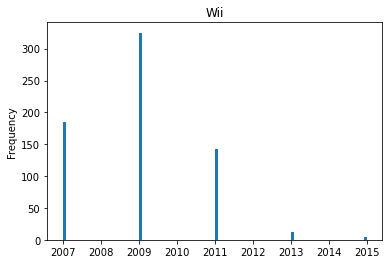

In [131]:
data_top[(data_top['platform']=='Wii')&(data_top['year_of_release'])>0]['year_of_release'].plot(title='Wii', kind='hist', bins =100);

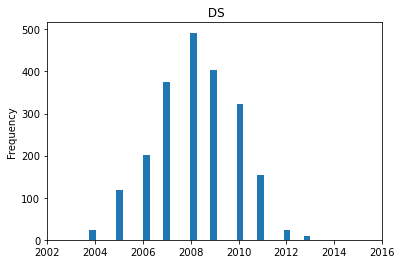

In [132]:
data_top[(data_top['platform']=='DS')&(data_top['year_of_release']>0)]['year_of_release'].plot(title=' DS', kind='hist',xlim=(2002,2016), bins =100);

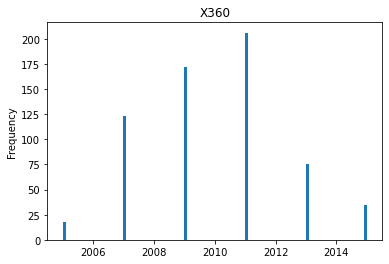

In [133]:
data_top[(data_top['platform']=='X360')&(data_top['year_of_release'])>0]['year_of_release'].plot(title='X360', kind='hist', bins =100, );

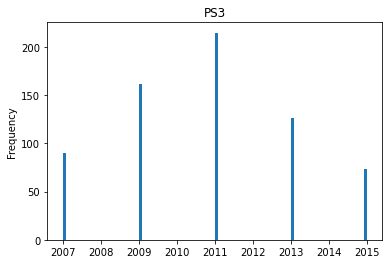

In [134]:
data_top[(data_top['platform']=='PS3')&(data_top['year_of_release'])>0]['year_of_release'].plot(title='PS3', kind='hist', bins =100);


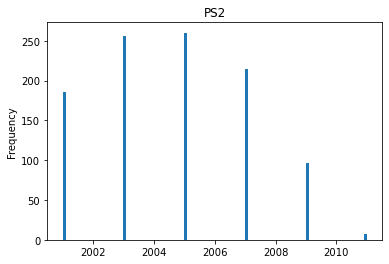

In [135]:
data_top[(data_top['platform']=='PS2')&(data_top['year_of_release'])>0]['year_of_release'].plot(title='PS2', kind='hist', bins =100);

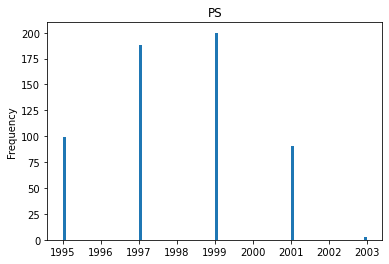

In [136]:
data_top[(data_top['platform']=='PS')&(data_top['year_of_release'])>0]['year_of_release'].plot(title='PS', kind='hist', bins =100);

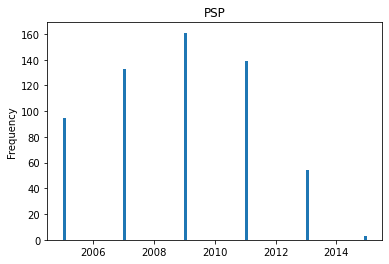

In [137]:
data_top[(data_top['platform']=='PSP')&(data_top['year_of_release'])>0]['year_of_release'].plot(title='PSP', kind='hist', bins =100);

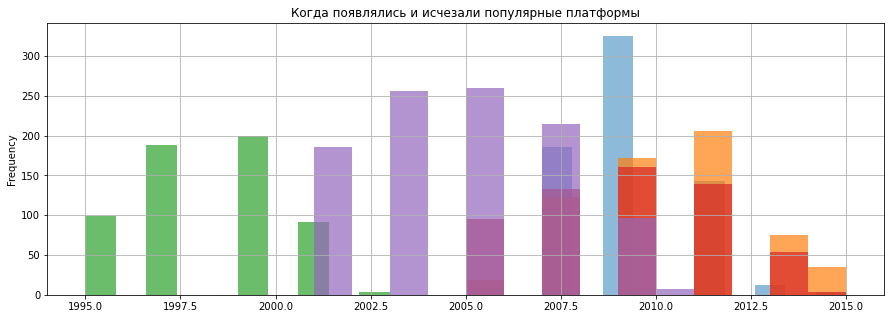

In [138]:
# популярные платформы на одном графике
data_top[(data_top['platform']=='Wii')&(data_top['year_of_release'])>0]['year_of_release'].plot( kind='hist', bins =10, label='Wii', alpha=0.5);
#data_top[(data_top['platform']=='DS')&(data_top['year_of_release']>0)]['year_of_release'].plot(title=' DS', kind='hist',xlim=(2002,2016), bins =10, alpha=0.7);
data_top[(data_top['platform']=='X360')&(data_top['year_of_release'])>0]['year_of_release'].plot(title='X360', kind='hist', bins =10, alpha=0.7);
data_top[(data_top['platform']=='PS')&(data_top['year_of_release'])>0]['year_of_release'].plot(title='PS', kind='hist', bins =10, alpha=0.7);
data_top[(data_top['platform']=='PSP')&(data_top['year_of_release'])>0]['year_of_release'].plot(title='PSP', kind='hist', bins =10, alpha=0.7, label='PSP',);
data_top[(data_top['platform']=='PS2')&(data_top['year_of_release'])>0]['year_of_release'].plot(title='Когда появлялись и исчезали популярные платформы', kind='hist', label='PS2', alpha=0.7, figsize=(15,5), grid=True);


In [139]:
data[data['year_of_release']==2016]['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

In [140]:
data[data['year_of_release']==2016]['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

**Вывод:** По гистограммам видно, что пики количество продаж для самых популярных платформ приходятся на 1999-2012 года. Проводить исследование по этому периоду не актуально для построения прогноза на 2017 год.
Также заметна особенность: для многих платформ (кроме DS) данные собраны за каждые два года.


Исследуем данные за последние 6 лет:
1. определим самые продаваемые платформы за период 2011-2016;
2. выделим такие платформы в отдельный датасет;
3. посмотрим, как менялись продажи за последние 6 лет (построим для них гистограммы по году с 2011 по 2016 года).

In [141]:
data[data['year_of_release']>2014]['platform'].value_counts()

PS4     301
PSV     195
XOne    167
3DS     132
PS3     111
PC      104
X360     48
WiiU     42
Wii       5
PSP       3
Name: platform, dtype: int64

In [142]:
#ограничим данные актуальным периодом (2011-2016 гг), по которому будем проводить исследование
data_top2 = data_top[data_top['year_of_release']>2010]
# выделим в отдельный датасет популярные платформы
data_top2 = data[(data['platform'] == 'PS4')| (data['platform'] =='PSV')|(data['platform'] == 'XOne')|(data['platform'] == '3DS')|(data['platform'] == 'PS3')|(data['platform'] == 'PC')]
data_top2.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,нет данных,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,нет данных,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33


In [143]:
data_top2['year_of_release'].unique()

array([2013, 2015, 2012, 2011, 2010, 2014, 2009, 2008, 2016, 2007, 2004,
       1996, 2006, 1995, 1997, 2002, 1994, 2000, 2001, 1992, 1998, 1999,
       2003,    0, 2005, 1985, 1988])

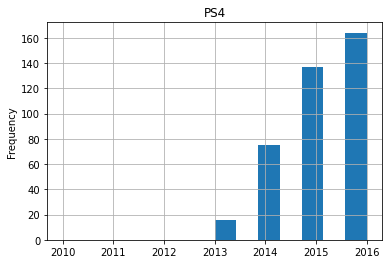

In [144]:
data_top2[(data_top2['platform']=='PS4')]['year_of_release'].plot(title='PS4', kind='hist',range=(2010,2016), bins=14, grid=True);

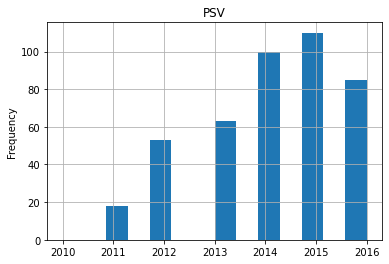

In [145]:
data_top2[(data_top2['platform']=='PSV')]['year_of_release'].plot(title='PSV', kind='hist',range=(2010,2016), bins=14, grid=True);

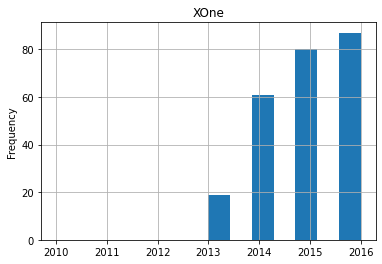

In [146]:
data_top2[(data_top2['platform']=='XOne')]['year_of_release'].plot(title='XOne', kind='hist',range=(2010,2016),bins=14, grid=True);

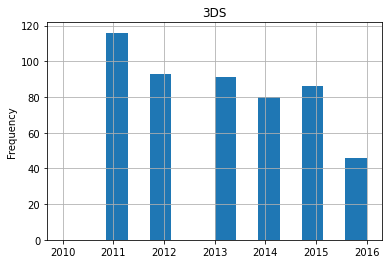

In [147]:
data_top2[(data_top2['platform']=='3DS')]['year_of_release'].plot(title='3DS', kind='hist',range=(2010,2016), bins=14, grid=True);

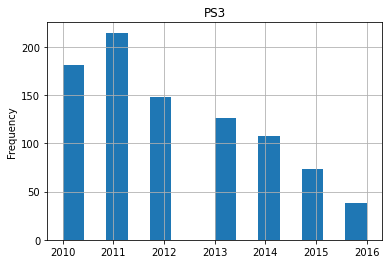

In [148]:
data_top2[(data_top2['platform']=='PS3')]['year_of_release'].plot(title='PS3', kind='hist',range=(2010,2016), bins=14, grid=True);

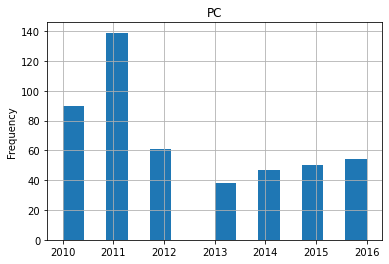

In [149]:
data_top2[(data_top2['platform']=='PC')]['year_of_release'].plot(title='PC', kind='hist',range=(2010,2016), bins=14, grid=True);

In [150]:
data_top2['platform'].unique()

array(['PS3', 'PS4', '3DS', 'PC', 'XOne', 'PSV'], dtype=object)

**Вывод:** по гистограммам видно, что за последние 6 лет количество продаж игр для платформ 
* PS4 и XOne возрасло; 
* PS3 сильно уменьшилось;
* 3DS c 2011 по 2015 гг наблюдался плавный спад, в 2016 г количество продаж резко уменьшилось;
* PSV: пик продаж приходится на 2015 г, в 2016 наблюдается небольшой спад, вероятность продаж в 2017 велика;
* PC с 2013 года наблюдается небольшой рост.

Таким образом, можно выделить следующие потенциально прибыльные платформы:
PS4, XOne, PSV, PC.


Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

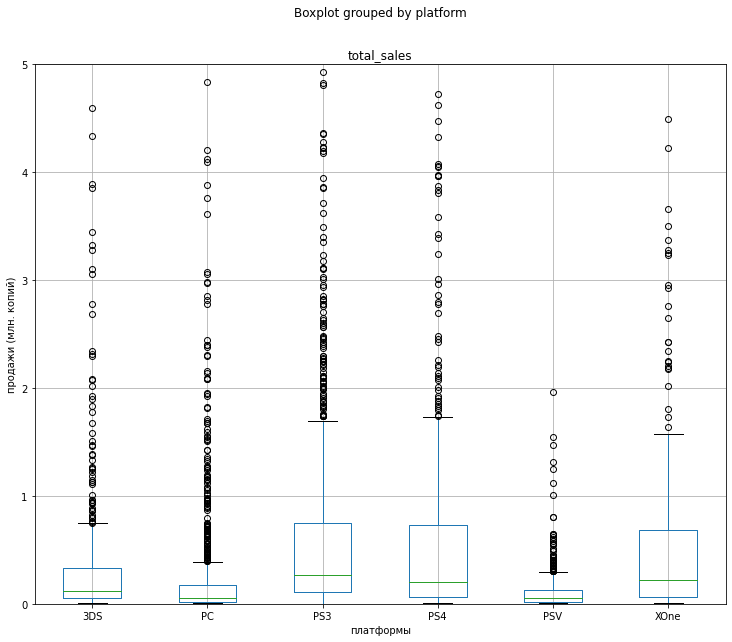

In [152]:
data_top2.boxplot('total_sales', by = 'platform', figsize=(12,10));
plt.xlabel('платформы')
plt.ylabel('продажи (млн. копий)');
plt.ylim(0,5);


**Вывод:** 

по графикам видно, что большее число игр продано для платформ PS3 и PS4 (более 1,5 млн. копий), меньше всего продаж совершено для PC и PSV (менее 0,5 млн. копий).

**Влияние рейтинга пользователей и критиков на продажи популярных платформ**

Посмотрите, как влияют на продажи отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [153]:
data_top2['platform'].value_counts()

PS3     1331
PC       974
3DS      520
PSV      430
PS4      392
XOne     247
Name: platform, dtype: int64

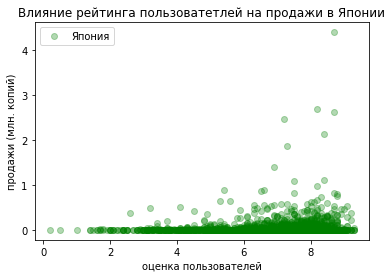

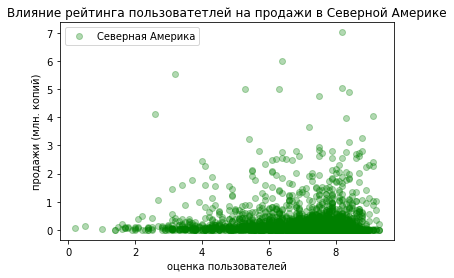

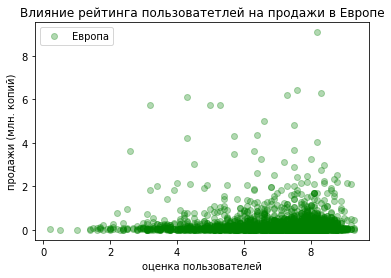

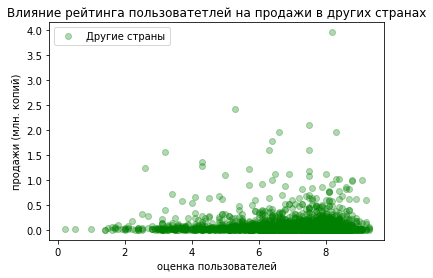

In [154]:
#построим диаграмму рассеяния для продаж всех популярных платформ в разных регионах и отзывов пользователей
data_top2.plot(x='user_score', y='jp_sales', style='o', label='Япония', color='g', alpha=0.3, title='Влияние рейтинга пользоватетлей на продажи в Японии')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи (млн. копий)')

data_top2.plot(x='user_score', y='na_sales', style='o', label='Северная Америка', color='g', alpha=0.3, title='Влияние рейтинга пользоватетлей на продажи в Северной Америке')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи (млн. копий)')

data_top2.plot(x='user_score', y='eu_sales', style='o', label='Европа', color='g', alpha=0.3, title='Влияние рейтинга пользоватетлей на продажи в Европе')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи (млн. копий)')

data_top2.plot(x='user_score', y='other_sales', style='o', color='g', label='Другие страны', alpha=0.3, title='Влияние рейтинга пользоватетлей на продажи в других странах')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи (млн. копий)');

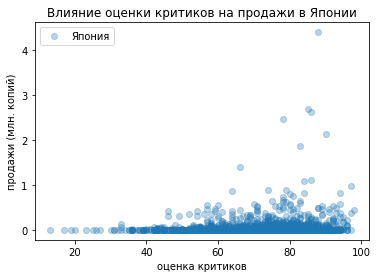

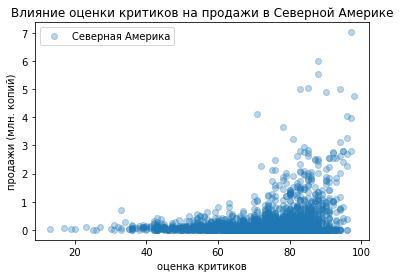

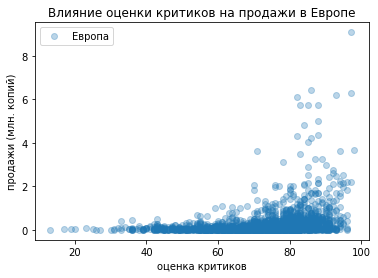

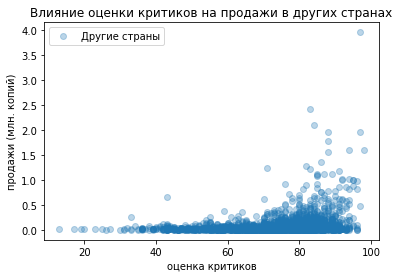

In [155]:
#построим диаграмму рассеяния для продаж в разных регионах и отзывов пользователей
data_top2.plot(x='critic_score', y='jp_sales', style='o', label='Япония', alpha=0.3, title='Влияние оценки критиков на продажи в Японии')
plt.xlabel('оценка критиков')
plt.ylabel('продажи (млн. копий)')

data_top2.plot(x='critic_score', y='na_sales', style='o', label='Северная Америка', alpha=0.3, title='Влияние оценки критиков на продажи в Северной Америке')
plt.xlabel('оценка критиков')
plt.ylabel('продажи (млн. копий)')

data_top2.plot(x='critic_score', y='eu_sales', style='o', label='Европа', alpha=0.3, title='Влияние оценки критиков на продажи в Европе')
plt.xlabel('оценка критиков')
plt.ylabel('продажи (млн. копий)')

data_top2.plot(x='critic_score', y='other_sales', style='o', label='Другие страны', alpha=0.3, title='Влияние оценки критиков на продажи в других странах')
plt.xlabel('оценка критиков')
plt.ylabel('продажи (млн. копий)');

In [156]:
# выделим колонки с рейтингом и прожадами в отдельный датасет
top_corr = data_top2[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']]
# посчитаем коэффициент корреляции между отзывами и продажами
top_corr.corr()


,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
na_sales,1.000000,0.744891,0.330053,0.811448,0.310500,0.040467
eu_sales,0.744891,1.000000,0.283089,0.895909,0.291208,0.010788
jp_sales,0.330053,0.283089,1.000000,0.238776,0.102629,0.112710
other_sales,0.811448,0.895909,0.238776,1.000000,0.281345,0.021476
critic_score,0.310500,0.291208,0.102629,0.281345,1.000000,0.581785
user_score,0.040467,0.010788,0.112710,0.021476,0.581785,1.000000


**Вывод:** по диаграммам рассеяния и коэффициентам корреляции для популярных платформ видно, что
1. зависимость между отзывами пользователей и количеством покупок отсутствует (максимальное значение коэффициента Пирсона для Японии 0.11, в других регионах менее 0.05);
2. мнение критиков имеет бОльшее влияние на количество покупок: во всех регионах, кроме Японии коэффициент корреляции 0.28-0.31, в Японии 0.1.
3. в Японии отзывы пользователей и критиков не влияют на количество покупок, коэффициент корреляции в обоих случаях составляет всего 0.1.

**Влияние рейтинга пользователей и критиков на продажи одной из популярных платформ**


Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для анализа выберем платформу PS3. 
Для анализа выберем платформу PS3.
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [157]:
#выделим данные о платформе в отдельный датасет
ps3 = data_top2[data_top2['platform']=='PS3']
#удалим строки без отзывов пользователей
ps3 = ps3.dropna()
ps3.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

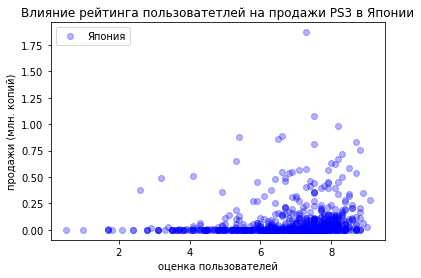

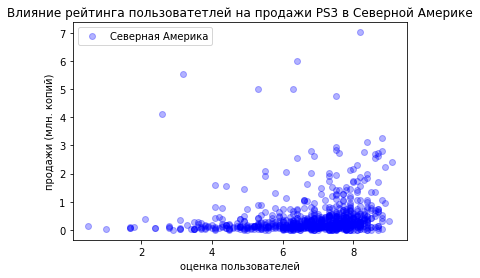

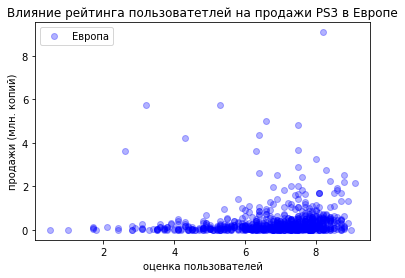

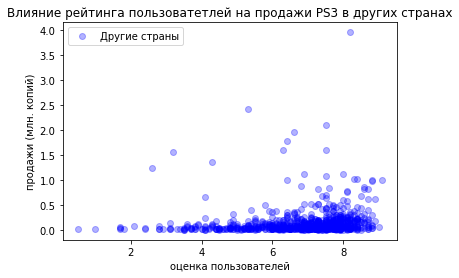

In [158]:
#построим диаграмму рассеяния для продаж в разных регионах и отзывов пользователей
ps3.plot(x='user_score', y='jp_sales', style='o', color='b', label = 'Япония', alpha=0.3, title='Влияние рейтинга пользоватетлей на продажи PS3 в Японии')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи (млн. копий)')

ps3.plot(x='user_score', y='na_sales', style='o', label='Северная Америка', color='b',  alpha=0.3, title='Влияние рейтинга пользоватетлей на продажи PS3 в Северной Америке')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи (млн. копий)')

ps3.plot(x='user_score', y='eu_sales', style='o', color='b', alpha=0.3,label = 'Европа', title='Влияние рейтинга пользоватетлей на продажи PS3 в Европе')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи (млн. копий)')

ps3.plot(x='user_score', y='other_sales', style='o', color='b', label = 'Другие страны', alpha=0.3, title='Влияние рейтинга пользоватетлей на продажи PS3 в других странах')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи (млн. копий)');

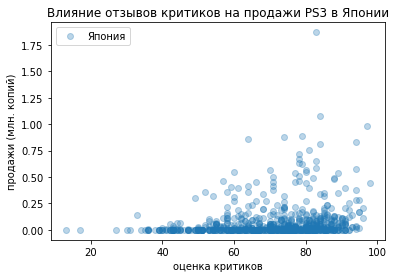

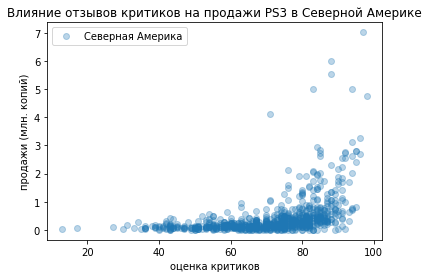

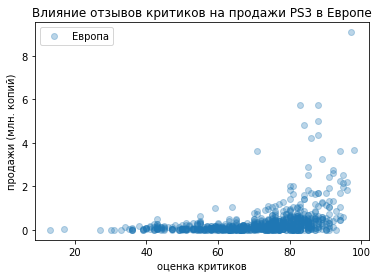

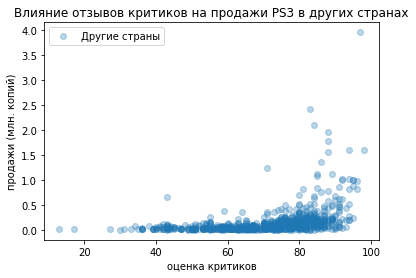

In [159]:
ps3.plot(x='critic_score', y='jp_sales', label = 'Япония', style='o', alpha=0.3, title='Влияние отзывов критиков на продажи PS3 в Японии')
plt.xlabel('оценка критиков')
plt.ylabel('продажи (млн. копий)')

ps3.plot(x='critic_score', y='na_sales', style='o',label = 'Северная Америка', alpha=0.3, title='Влияние отзывов критиков на продажи PS3 в Северной Америке')
plt.xlabel('оценка критиков')
plt.ylabel('продажи (млн. копий)')

ps3.plot(x='critic_score', y='eu_sales', style='o', label = 'Европа', alpha=0.3, title='Влияние отзывов критиков на продажи PS3 в Европе')
plt.xlabel('оценка критиков')
plt.ylabel('продажи (млн. копий)')

ps3.plot(x='critic_score', y='other_sales', style='o', label = 'Другие страны', alpha=0.3, title='Влияние отзывов критиков на продажи PS3 в других странах')
plt.xlabel('оценка критиков')
plt.ylabel('продажи (млн. копий)');

In [160]:
# выделим колонки с рейтингом и прожадами в отдельный датасет
ps3_corr = ps3[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']]
# посчитаем коэффициент корреляции между отзывами и продажами
ps3_corr.corr()


,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
na_sales,1.000000,0.824895,0.371609,0.871541,0.450681,0.151200
eu_sales,0.824895,1.000000,0.413134,0.977684,0.376543,0.104547
jp_sales,0.371609,0.413134,1.000000,0.412063,0.195761,0.166976
other_sales,0.871541,0.977684,0.412063,1.000000,0.390825,0.127409
critic_score,0.450681,0.376543,0.195761,0.390825,1.000000,0.629005
user_score,0.151200,0.104547,0.166976,0.127409,0.629005,1.000000


**Вывод:** по диаграммам рассеяния и коэффициентам корреляции для одной из популярных платформ (PS3) видно, что
1. зависимость между отзывами пользователей и количеством покупок невелика, однако чуть больше, чем для всех популярных платформ вцелом; 
сильнее всего эта зависимость в Японии и Северной Америке(коэффициент Пирсона 0.15 и 0.17 соответственно, в других регионах не менее 0.10);
2. мнение критиков имеет большее влияние на количество покупок во всех регионах (коэффициент корреляции 0.38-0.45), кроме Японии (0.19);
влияние отзывов критиков на продажи PS3  выше, чем для всех платформ вцелом;
3. в Японии отзывы пользователей и критиков имеют одинаково слабое влияние на количество покупок как PS3, так и других популярных платформ, коэффициент корреляции для PS3  составляет всего 0.16 и 0.19 (что чуть выше, чем для всех популярных платформ).

**Распределение игр по жанрам (старая версия)**

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [161]:
# посмотрим, сколько игр выпущено в каждом жанре
data_top2['genre'].value_counts()

Action          1116
Role-Playing     462
Shooter          397
Sports           397
Adventure        312
Misc             266
Strategy         243
Racing           214
Simulation       196
Fighting         137
Platform         102
Puzzle            52
Name: genre, dtype: int64

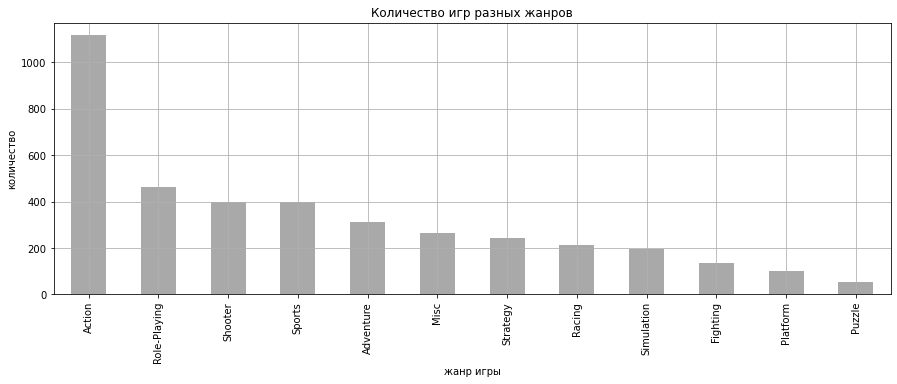

In [162]:
# построим столбчатую диаграмму для более наглядного представления

data_top2.groupby('genre')['name'].count().sort_values(ascending=False).plot(title='Количество игр разных жанров', y='genre', x='name', kind='bar', grid = True, color='darkgray', figsize=(15,5))
plt.xlabel('жанр игры')
plt.ylabel('количество');

,total_sales
genre,
Action,541.82
Shooter,392.38
Role-Playing,257.56
Sports,238.46
Racing,115.55
Simulation,92.34
Misc,86.43
Fighting,75.68
Platform,73.97


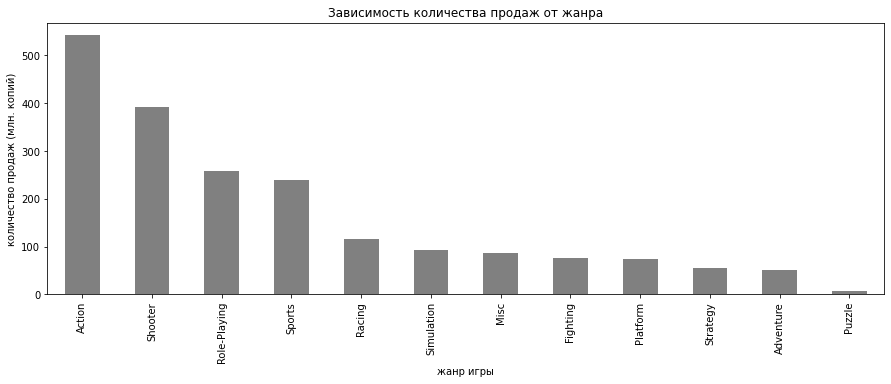

In [163]:
# посмотрим, как распределены продажи по жанрам игр, для этого воспользуемся сводной таблицей
top_pivot = data_top2.pivot_table(index='genre',  values='total_sales', aggfunc='sum');
top_pivot = top_pivot.sort_values(by='total_sales', ascending=False);
display(top_pivot);
#построим столбчатую диаграмму для наглядной демнострации количества продаж для разных жанров
#top_pivot.plot(title='Зависимость количества продаж от жанра',x ='genre', Y='total_sales', kind='bar', figsize=(3,3))
#top_pivot.hist()
data_top2.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(title='Зависимость количества продаж от жанра', y='total_sales', x='genre', kind='bar', color='gray', figsize=(15,5));
plt.xlabel('жанр игры')
plt.ylabel('количество продаж (млн. копий)');

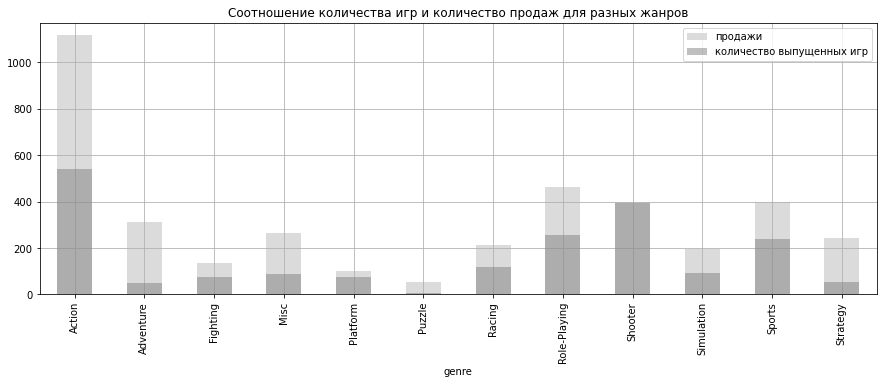

In [164]:
data_top2.groupby('genre')['name'].count().plot(y='genre', x='name', kind='bar', grid = True, color='lightgray', alpha=0.8, figsize=(15,5), label = 'количество игр')
data_top2.groupby('genre')['total_sales'].sum().plot(title='Соотношение количества игр и количество продаж для разных жанров', y='total_sales', x='genre', kind='bar', color='gray', alpha=0.5, grid=True, figsize=(15,5), label = 'продажи', zorder=2);
plt.legend({'количество выпущенных игр','продажи'});

**Вывод**

Выделяются следующие жанры игр, лидирующие по количеству продаж:
* Action
* Shooter
* Role-Playing
* Sports

Количество продаж игр данных жанров превышает 160 млн. копий для каждого жанра, количество продаж для других жанров менее 60 млн. копий.

Наименее популярный жанр -- Puzzle.

**Распределение игр по жанрам (исправленная версия)**

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

,total_sales
genre,
Shooter,0.330
Fighting,0.230
Platform,0.220
Sports,0.210
Racing,0.160
Role-Playing,0.155
Action,0.140
Misc,0.120
Simulation,0.080


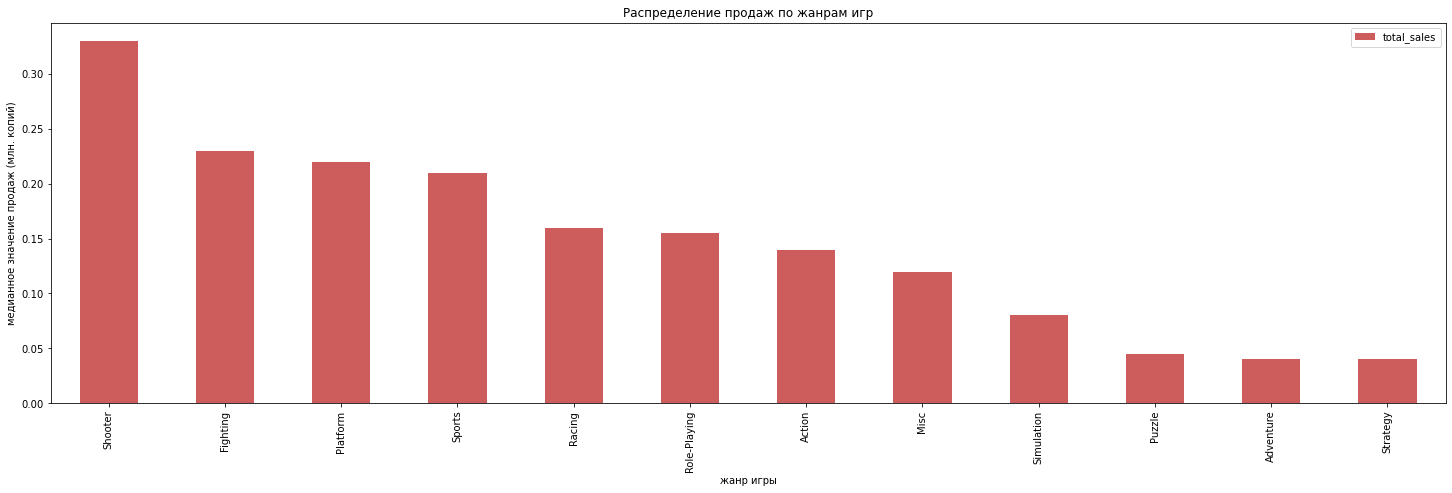

In [165]:
# посмотрим, как распределены медианные значения продаж по жанрам игр, для этого воспользуемся сводной таблицей
top_pivot = data_top2.pivot_table(index='genre',  values='total_sales', aggfunc='median');
top_pivot = top_pivot.sort_values(by='total_sales', ascending=False)
display(top_pivot)

#построим столбчатую диаграмму для наглядной демнострации количества продаж для разных жанров
top_pivot.plot(title='Распределение продаж по жанрам игр', kind='bar',figsize=(25,7), color='indianred')
plt.xlabel('жанр игры')
plt.ylabel('медианное значение продаж (млн. копий)');

**Вывод**

Выделяются следующие жанры игр, лидирующие по медианным значениям продаж:

* Shooter
* Fighting
* Platform
* Sports

Количество медианных значений продаж игр данных жанров превышает 0.2 млн. копий для каждого жанра, количество продаж для других жанров менее 0.2 млн. копий.

Наименее прибыльные жанры: Puzzle, Adventure, Strategy.

## Составление портрета пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
* самые популярные платформы (топ-5);
* самые популярные жанры (топ-5);
* влияет ли рейтинг ESRB на продажи в отдельном регионе.

Исследование проведем для данных за последние 3 года.

In [166]:
#выделим из изначальной таблицы данные за последние три года
data = data[data['year_of_release']>2014]

**Северная Америка**

In [167]:
# топ-5 платформ в Северной Америке
na_pivot = data.pivot_table(index='platform',  values='na_sales',  aggfunc='sum')
na_pivot = na_pivot.sort_values(by='na_sales', ascending=False)
display(na_pivot.head(5))

,na_sales
platform,
PS4,63.86
XOne,50.30
3DS,10.31
WiiU,8.86
X360,8.05


In [168]:
# топ-5 жанров игр в Северной Америке
na_genre_pivot = data.pivot_table(index='genre',  values='na_sales',  aggfunc='sum')
na_genre_pivot = na_genre_pivot.sort_values(by='na_sales', ascending=False)
display(na_genre_pivot.head(5))

,na_sales
genre,
Shooter,48.18
Action,33.68
Sports,26.31
Role-Playing,19.82
Misc,5.58


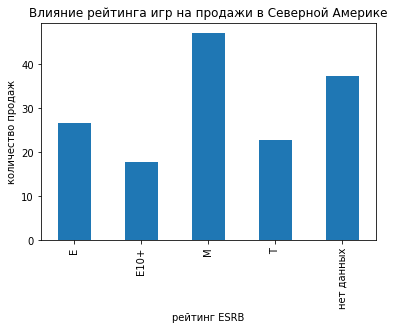

In [169]:
data.groupby('rating')['na_sales'].sum().plot(title='Влияние рейтинга игр на продажи в Северной Америке', x='rating',y='na_sales', kind='bar');
plt.xlabel('рейтинг ESRB');
plt.ylabel('количество продаж');

**Европа**

In [170]:
# топ-5 платформ в Европе
eu_pivot = data.pivot_table(index='platform',  values='eu_sales',  aggfunc='sum')
eu_pivot = eu_pivot.sort_values(by='eu_sales', ascending=False)
display(eu_pivot.head(5))

,eu_sales
platform,
PS4,83.54
XOne,28.10
PC,9.10
3DS,7.39
PS3,7.30


In [171]:
# топ-5 жанров игр в Европе
eu_genre_pivot = data.pivot_table(index='genre',  values='eu_sales',  aggfunc='sum')
eu_genre_pivot = eu_genre_pivot.sort_values(by='eu_sales', ascending=False)
display(eu_genre_pivot.head(5))

,eu_sales
genre,
Shooter,40.28
Action,34.82
Sports,27.82
Role-Playing,17.21
Racing,6.52


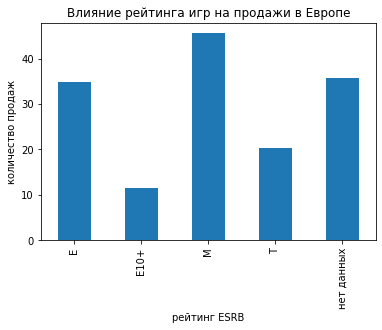

In [172]:
data.groupby('rating')['eu_sales'].sum().plot(title='Влияние рейтинга игр на продажи в Европе', x='rating',y='eu_sales', kind='bar');
plt.xlabel('рейтинг ESRB');
plt.ylabel('количество продаж');

**Япония**

In [173]:
# топ-5 платформ в Японии
jp_pivot = data.pivot_table(index='platform',  values='jp_sales',  aggfunc='sum')
jp_pivot = jp_pivot.sort_values(by='jp_sales', ascending=False)
display(jp_pivot.head(5))

,jp_sales
platform,
3DS,23.55
PS4,12.05
PSV,8.41
PS3,4.97
WiiU,4.12


In [174]:
# топ-5 жанров игр в Японии
jp_genre_pivot = data.pivot_table(index='genre',  values='jp_sales',  aggfunc='sum')
jp_genre_pivot = jp_genre_pivot.sort_values(by='jp_sales', ascending=False)
display(jp_genre_pivot.head(5))

,jp_sales
genre,
Action,23.05
Role-Playing,13.41
Shooter,3.79
Misc,3.19
Adventure,2.22


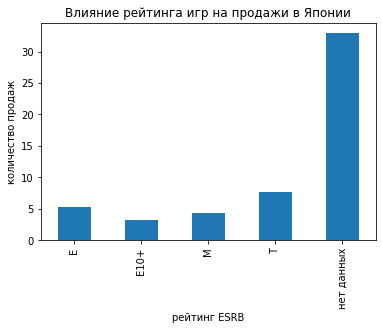

In [175]:
data.groupby('rating')['jp_sales'].sum().plot(title='Влияние рейтинга игр на продажи в Японии', x='rating',y=('jp_sales','total_sales'), kind='bar');
plt.xlabel('рейтинг ESRB');
plt.ylabel('количество продаж');

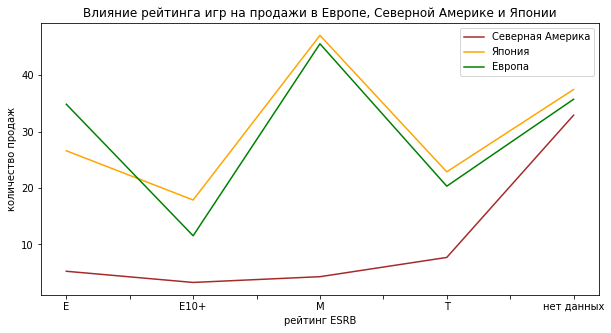

In [176]:
data.groupby('rating')['jp_sales'].sum().plot(x='rating',y='jp_sales', color='brown')
data.groupby('rating')['na_sales'].sum().plot(x='rating',y='na_sales', color='orange')
data.groupby('rating')['eu_sales'].sum().plot(title='Влияние рейтинга игр на продажи в Европе, Северной Америке и Японии', x='rating',y='eu_sales', color='green', figsize=(10,5));

plt.xlabel('рейтинг ESRB');
plt.ylabel('количество продаж');
plt.legend({ 'Северная Америка',  'Европа','Япония'});

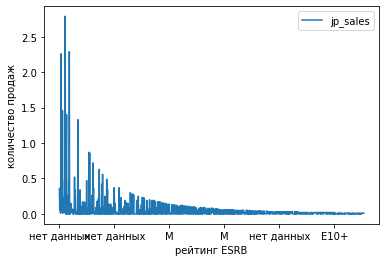

In [177]:
rating_jp = data[['rating', 'jp_sales']];
rating_jp.plot(x='rating',y='jp_sales');
#data.groupby('rating')['total_sales'].count().plot(title='Влияние рейтинга игр на продажи в Японии', x='rating',y='total_sales', kind='bar')
#plt.y('total_sales')
plt.xlabel('рейтинг ESRB');
plt.ylabel('количество продаж');

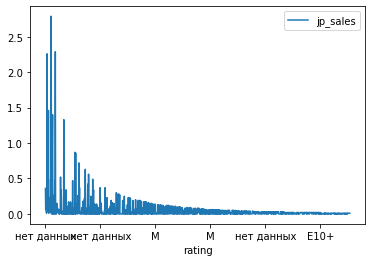

In [178]:
rating_jp = data[['rating', 'jp_sales']];
rating_jp.plot(x='rating',y='jp_sales');

Чтобы выяснить, влияет ли рейтинг на продажи в отдельном регионе, составим матрицу корреляций.

Для этого выделим в отдельный датасет столбцы с данными о продажах в отдельных регионах и столбец с рейтингом игр.


In [179]:
corr = data[['na_sales', 'eu_sales', 'jp_sales', 'rating']]
corr.corr()

,na_sales,eu_sales,jp_sales
na_sales,1.000000,0.700252,0.194768
eu_sales,0.700252,1.000000,0.153035
jp_sales,0.194768,0.153035,1.000000


In [180]:
data['rating'].unique()

array(['нет данных', 'E', 'M', 'T', 'E10+'], dtype=object)

**Вывод:**
в Европе и Северной Америке поведение пользователей похоже: лучше других продаются игры с рейтингом M*, также популярны игры с рейтингом E (для всех) и игры без рейтинга;
в Японии рейтинг слабо влияет на продажи, чуть лучше других продаются игры с рейтингом T (для подростков), значительно преобладают продажи игр без рейтинга.

* \*«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории*.

**Портрет пользователя каждого региона**

**Северная Америка**
* самые популярные платформы (топ-5): PS4, XOne, 3DS, Wii, X360
* самые популярные жанры (топ-5): Shooter, Action, Sports, Role-Playing, Misc
* лучше других продаются игры с рейтингом ESRB M*, также популярны игры с рейтингом E (для всех) и игры без рейтинга
	

**Европа**
* самые популярные платформы (топ-5): PS4, XOne, PC, 3DS, PS3
* самые популярные жанры (топ-5): Shooter, Action, Sports, Role-Playing, Racing
* лучше других продаются игры с рейтингом ESRB M*, также популярны игры с рейтингом E (для всех) и игры без рейтинга

**Япония**
* самые популярные платформы (топ-5): 3DS, PS4, PSV, PS3, WiiU
* самые популярные жанры (топ-5): Action, Role-Playing, Shooter, Misc, Adventure	
* рейтинг ESRB слабо влияет на продажи, чуть лучше других продаются игры с рейтингом T (для подростков), значительно преобладают продажи игр без рейтинга


## Проверка гипотез


### ***Гипотеза 1.***

H0:
Средние пользовательские рейтинги платформ Xbox One и PC равны.

H1:
Средние пользовательские рейтинги платформ Xbox One и PC не равны.




In [181]:
#1. выделим рейтинги платформ в отдельные датасеты, заменим пропуски на 0.

xone = data['user_score'][data['platform']=='XOne']
pc = data['user_score'][data['platform']=='PC']
#заменим пропуски на 0
xone = xone.fillna(0)
pc = pc.fillna(0)

#2. Зададим критический уровень статистической значимости равный 5%.
alpha = .05 

results = st.ttest_ind(xone, pc, equal_var = False)

display('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу") 

'p-значение:'

0.36449266841834405

'Не получилось отвергнуть нулевую гипотезу'


### ***Гипотеза 2.***

H0:
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.

H1:
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны.

In [182]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,нет данных,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,нет данных,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,нет данных,7.39


In [183]:
#1. выделим рейтинги платформ в отдельные датасеты, заменим пропуски на 0.

action = data['user_score'][data['genre']=='Action']
sports = data['user_score'][data['genre']=='Sports']
#заменим пропуски на 0
action = action.fillna(0)
sports = sports.fillna(0)

#2. Зададим критический уровень статистической значимости равный 5%.
alpha = .05 

results = st.ttest_ind(action, sports, equal_var = False)

display('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу") 

'p-значение:'

0.003777033301971116

'Отвергаем нулевую гипотезу'

**Вывод:**
Первая гипотеза верна. Средние пользовательские рейтинги платформ Xbox One и PC равны.
Вторая гипотреза не верна. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны.   

# Общий вывод


В ходе исследования были выполнены следующие этапы:

**1. Изучение данных**

* исходная таблица содержит 11 столбцов и 16715 строк;
* имена столбцов содержат заглавные буквы;
* присутствуют два типа данных: object, float;
* есть пропуски в 5 столбцах;
* дубликаты отсутствуют.

**2. Подготовка данных**
В ходе водготовки данных выполнены следующие действия:
* названия столбцов приведены к нижнему регистру;
* заменен тип данных в столбце 'year_of_release' на int для более удобного отображения года выхода;
* удалены 2 строки с пропусками в колонке с названием игры 'Name'; пропуски в колонках с рейтингом оставлены.
* в столбце 'user_score' значения 'tbd' заменены на 'nan' и изменен тип object на float
* добавлен столбец с суммарным количеством продаж во всех регионах

**3. Исследовательский анализ данных**

1) Выделен актуальный период для построения прогноза на 2017 год: 2011-2016. 
2) Определены популярные платформы:
PS4     
PSV     
XOne   
3DS     
PS3     
PC 

3) Исследовано изменение продаж для популярных платформ за актуальный период:
PS4 и XOne возрасло;
PS3 сильно уменьшилось;
3DS c 2011 по 2015 гг наблюдался плавный спад, в 2016 г количество продаж резко уменьшилось;
PSV: пик продаж приходится на 2015 г, в 2016 наблюдается небольшой спад, вероятность продаж в 2017 велика;
PC с 2013 года наблюдается небольшой рост.

Таким образом, выделены потенциально прибыльные платформы: PS4, XOne, PSV, PC.

4) Исследовано влияние рейтинга пользователей и критиков на количество продаж популярных платформ.
Зависимость между отзывами пользователей и количеством покупок невелика, сильнее всего эта зависимость в Японии (коэффициент Пирсона 0.11, в других регионах менее 0.05);
мнение критиков имеет бОльшее влияние на количество покупок: во всех регионах, кроме Японии коэффициент корреляции 0.28-0.31, в Японии 0.1.
в Японии отзывы пользователей и критиков имеют примерно одинаковое влияние на количество покупок, но коэффициент корреляции в обоих случаях составляет всего 0.1.

5) Исследовано влияние рейтинга пользователей и критиков на количество продаж одной из популярных платформ PS3.

* зависимость между отзывами пользователей и количеством покупок невелика, однако чуть больше, чем для всех популярных платформ вцелом; 
сильнее всего эта зависимость в Японии и Северной Америке(коэффициент Пирсона 0.15 и 0.17 соответственно, в других регионах не менее 0.10);
* мнение критиков имеет большее влияние на количество покупок во всех регионах (коэффициент корреляции 0.38-0.45), кроме Японии (0.19);
влияние отзывов критиков на продажи PS3  выше, чем для всех платформ вцелом;
* в Японии отзывы пользователей и критиков имеют одинаково слабое влияние на количество покупок как PS3, так и других популярных платформ, коэффициент корреляции для PS3  составляет всего 0.16 и 0.19 (что чуть выше, чем для всех популярных платформ).

6) Построены диаграммы рассеяния и определены коэффициентам корреляции для одной из популярных платформ (PS3). Видно, что
* зависимость между отзывами пользователей и количеством покупок невелика, однако чуть больше, чем для всех популярных платформ вцелом; 
сильнее всего эта зависимость в Японии и Северной Америке(коэффициент Пирсона 0.15 и 0.17 соответственно, в других регионах не менее 0.10);
* мнение критиков имеет большее влияние на количество покупок во всех регионах (коэффициент корреляции 0.38-0.45), кроме Японии (0.19);
влияние отзывов критиков на продажи PS3  выше, чем для всех платформ вцелом;
* в Японии отзывы пользователей и критиков имеют одинаково слабое влияние на количество покупок как PS3, так и других популярных платформ, коэффициент корреляции для PS3  составляет всего 0.16 и 0.19 (что чуть выше, чем для всех популярных платформ).

7) Определены жанры игр, лидирующие по количеству продаж:

* Shooter
* Fighting
* Platform
* Sports

Количество медианных значений продаж игр данных жанров превышает 0.2 млн. копий для каждого жанра, количество продаж для других жанров менее 0.2 млн. копий.

Наименее прибыльные жанры: Puzzle, Adventure, Strategy.

**4. Составление портрета пользователя каждого региона**

*Северная Америка*
* самые популярные платформы (топ-5): PS4, XOne, 3DS, Wii, X360
* самые популярные жанры (топ-5): Shooter, Action, Sports, Role-Playing, Misc
* лучше других продаются игры с рейтингом ESRB M*, также популярны игры с рейтингом E (для всех) и игры без рейтинга

*Европа*
* самые популярные платформы (топ-5): PS4, XOne, PC, 3DS, PS3
* самые популярные жанры (топ-5): Shooter, Action, Sports, Role-Playing, Racing
* лучше других продаются игры с рейтингом ESRB M*, также популярны игры с рейтингом E (для всех) и игры без рейтинга

*Япония*
* самые популярные платформы (топ-5): 3DS, PS4, PSV, PS3, WiiU
* самые популярные жанры (топ-5): Action, Role-Playing, Shooter, Misc, Adventure
* рейтинг ESRB слабо влияет на продажи, чуть лучше других продаются игры с рейтингом T (для подростков), значительно преобладают продажи игр без рейтинга


**5. Проверка гипотез**

Средние пользовательские рейтинги платформ Xbox One и PC равны.<br>
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны.